In [4]:
import pandas as pd
# For train/test split using professor id 
from sklearn.model_selection import GroupShuffleSplit 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.svm import SVC

## Cleaning Data

In [5]:
ratings_csv = pd.read_csv("MSU_ratings.csv")
ratings_csv

,prof_id,course,date,quality,difficulty,comments,thumbs_up,thumbs_down
0,790,MTH132,"Oct 9th, 2019",3.0,4.0,"Prof. Sagan is a nice, caring man, but he is n...",0,0
1,790,MTH317H,"Jan 3rd, 2014",5.0,3.0,AWESOME PROFESSOR!!!!!!!!!,0,0
2,790,MTH317H,"Nov 5th, 2013",5.0,4.0,Professor Sagan is really good math teacher. ...,0,0
3,790,MTH132,"Jan 11th, 2009",5.0,2.0,Excellent professor that was very clear in tea...,0,0
4,790,MATH254H,"Aug 10th, 2005",4.5,3.0,Awesome - made me want to become a Math major ...,0,0
...,...,...,...,...,...,...,...,...
13107,2650948,IAH211B,"Apr 25th, 2022",1.0,5.0,Anning Jing is an absolute abomination of a pr...,0,0
13108,2650948,IAH211B,"Apr 25th, 2022",1.0,5.0,Took IAH211B for university requirement credit...,0,0
13109,2650948,HA260,"Feb 2nd, 2022",1.0,5.0,Extremely vague. Skips around a LOT. Messy sli...,0,0
13110,2650948,IAH211B,"Apr 27th, 2021",1.0,5.0,This class has no reason for being harder than...,0,0


In [6]:
# Drop any ratings with no comments 
ratings_csv = ratings_csv.drop(ratings_csv[ratings_csv["comments"] == "No Comments"].index)
ratings_csv

,prof_id,course,date,quality,difficulty,comments,thumbs_up,thumbs_down
0,790,MTH132,"Oct 9th, 2019",3.0,4.0,"Prof. Sagan is a nice, caring man, but he is n...",0,0
1,790,MTH317H,"Jan 3rd, 2014",5.0,3.0,AWESOME PROFESSOR!!!!!!!!!,0,0
2,790,MTH317H,"Nov 5th, 2013",5.0,4.0,Professor Sagan is really good math teacher. ...,0,0
3,790,MTH132,"Jan 11th, 2009",5.0,2.0,Excellent professor that was very clear in tea...,0,0
4,790,MATH254H,"Aug 10th, 2005",4.5,3.0,Awesome - made me want to become a Math major ...,0,0
...,...,...,...,...,...,...,...,...
13107,2650948,IAH211B,"Apr 25th, 2022",1.0,5.0,Anning Jing is an absolute abomination of a pr...,0,0
13108,2650948,IAH211B,"Apr 25th, 2022",1.0,5.0,Took IAH211B for university requirement credit...,0,0
13109,2650948,HA260,"Feb 2nd, 2022",1.0,5.0,Extremely vague. Skips around a LOT. Messy sli...,0,0
13110,2650948,IAH211B,"Apr 27th, 2021",1.0,5.0,This class has no reason for being harder than...,0,0


In [7]:
X = ratings_csv["comments"]
# 1 for positive ratings, 0 for negative
y = ratings_csv["quality"]>=3

## Data Visualization

In [8]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(12345)

In [9]:
#https://medium.com/@cristhianboujon/how-to-list-the-most-common-words-from-text-corpus-using-scikit-learn-dad4d0cab41d
    
def get_top_n_words(text, n, stop_words = False):
    if stop_words:
        vectorizer = CountVectorizer(stop_words="english")
    else:
        vectorizer = CountVectorizer()

    X = vectorizer.fit_transform(text)
    
    # Get the feature names (words)
    feature_names = vectorizer.get_feature_names_out()

    # Calculate the word frequencies
    word_frequencies = X.toarray().sum(axis=0)
    
    # Sort the words by frequency in descending order
    sorted_words = sorted(zip(feature_names, word_frequencies), key=lambda x: x[1], reverse=True)

    # Get the top n words
    top_n_words = np.array(sorted_words[:n])
    return top_n_words

In [10]:
top_15_all = get_top_n_words(X, 15)
top_15_all_stop = get_top_n_words(X, 15, stop_words=True)

Text(0, 0.5, 'Count')

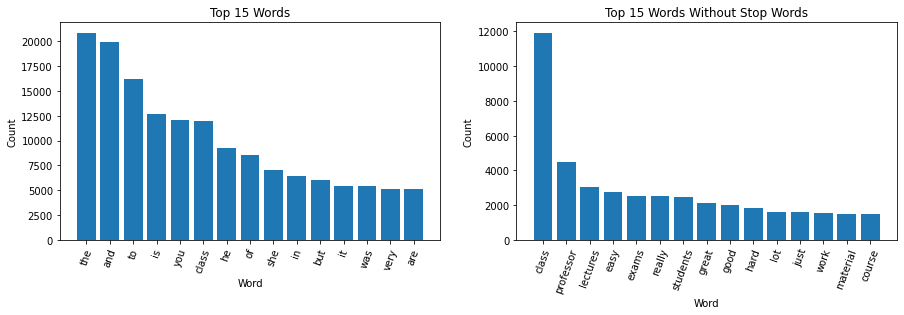

In [11]:
plt.figure(figsize=(15, 4)) 
plt.subplot(1,2,1)
plt.title("Top 15 Words")
plt.bar(top_15_all[:,0], top_15_all[:,1].astype('float64'))
plt.xticks(rotation=70)
plt.xlabel("Word")
plt.ylabel("Count")


plt.subplot(1,2,2)
plt.title("Top 15 Words Without Stop Words")
plt.bar(top_15_all_stop[:,0], top_15_all_stop[:,1].astype('float64'))
plt.xticks(rotation=70)
plt.xlabel("Word")
plt.ylabel("Count")

In [12]:
# positive ratings 
top_15_pos = get_top_n_words(X[y], 15)
top_15_pos_stop = get_top_n_words(X[y], 15, stop_words=True)

In [13]:
# negative ratings 
top_15_neg = get_top_n_words(X[~y], 15)
top_15_neg_stop = get_top_n_words(X[~y], 15, stop_words=True)

Text(0, 0.5, 'Count')

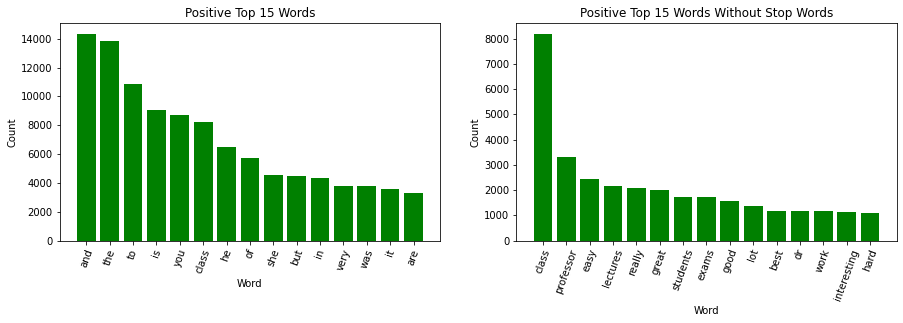

In [14]:
plt.figure(figsize=(15, 4)) 
plt.tight_layout()
plt.subplot(1,2,1)
plt.title("Positive Top 15 Words")
plt.bar(top_15_pos[:,0], top_15_pos[:,1].astype('float64'), color="g")
plt.xticks(rotation=70)
plt.xlabel("Word")
plt.ylabel("Count")

plt.subplot(1,2,2)
plt.title("Positive Top 15 Words Without Stop Words")
plt.bar(top_15_pos_stop[:,0], top_15_pos_stop[:,1].astype('float64'), color="g")
plt.xticks(rotation=70)
plt.xlabel("Word")
plt.ylabel("Count")


Text(0, 0.5, 'Count')

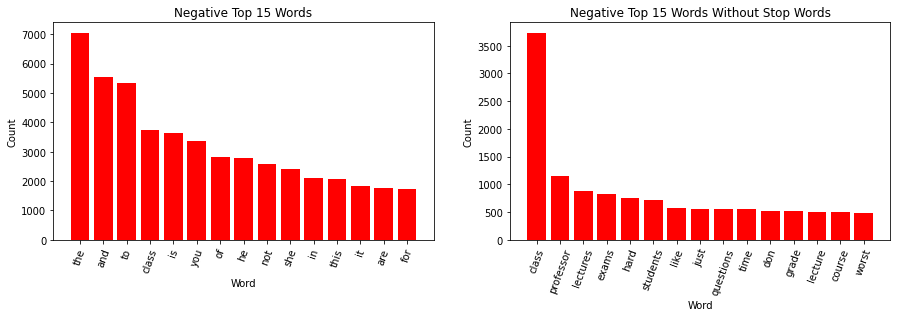

In [15]:
plt.figure(figsize=(15, 4)) 

plt.subplot(1,2,1)
plt.title("Negative Top 15 Words")
plt.bar(top_15_neg[:,0], top_15_neg[:,1].astype('float64'), color="r")
plt.xticks(rotation=70)
plt.xlabel("Word")
plt.ylabel("Count")

plt.subplot(1,2,2)
plt.title("Negative Top 15 Words Without Stop Words")
plt.bar(top_15_neg_stop[:,0], top_15_neg_stop[:,1].astype('float64'), color="r")
plt.xticks(rotation=70)
plt.xlabel("Word")
plt.ylabel("Count")

## Train Test Split

In [16]:
# https://stackoverflow.com/questions/54797508/how-to-generate-a-train-test-split-based-on-a-group-id
# Train test split 70/30 based on professor id 
splitter = GroupShuffleSplit(test_size=.30, n_splits=2, random_state = 20)
split = splitter.split(ratings_csv, groups=ratings_csv['prof_id'])
train_idx, test_idx = next(split)
X_train, X_test, y_train, y_test = X.iloc[train_idx], X.iloc[test_idx], y.iloc[train_idx], y.iloc[test_idx]

In [17]:
# Check that split was done properly 
print(f'Total Number of unique prof IDs: {len(pd.unique(ratings_csv["prof_id"]))}')
print(f'Number of unique prof IDs in train data: {len(pd.unique(ratings_csv.iloc[train_idx]["prof_id"]))}')
print(f'Number of unique prof IDs in test data: {len(pd.unique(ratings_csv.iloc[test_idx]["prof_id"]))}')

Total Number of unique prof IDs: 1662
Number of unique prof IDs in train data: 1163
Number of unique prof IDs in test data: 499


In [18]:
print(f"True split (based on number of ratings): {(len(X_train)/len(X))*100}% Train, {(len(X_test)/len(X))*100}% Test")

True split (based on number of ratings): 69.61006485895132% Train, 30.389935141048685% Test


## Preprocessing 

In [19]:
from preprocessing import stem_comments, top_n_stem_words
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

In [20]:
# (opt) Stemming 
# (opt) Stop Words 
# (opt) Ngram Tokenizing 
# (opt) Tf-IDF

In [21]:
def preprocessing(X_train, X_test, stemming=False, stop_words=False, ngram=False, tfidf=False):
    count_vec_args = {}
    if stemming == True:
        count_vec_args['tokenizer'] = stem_comments
    if stop_words == True:
        count_vec_args['stop_words'] = 'english'
    if ngram == True:
        count_vec_args['ngram_range'] = (2,2)
        
    pipeline_list = []
    pipeline_list.append(('count',CountVectorizer(**count_vec_args)))
    if tfidf == True:
        pipeline_list.append(('tfid', TfidfTransformer()))
    
    if pipeline_list == []:
        print("Empty Pipeline")
        return
    else:
        pipe = Pipeline(pipeline_list)
        print(pipe) # Print the pipeline, maybe delete this line later 
        X_train_vect = pipe.fit_transform(X_train)
        X_test_vect = pipe.transform(X_test)
        
    return X_train_vect, X_test_vect

In [73]:
# vectorizer = CountVectorizer(
#     stop_words = "english",
#     tokenizer=stem_comments,
#     ngram_range=(2,2)
# )
# tf_transform = TfidfTransformer()

In [74]:
# X_train_vect = tf_transform.fit_transform(
#     vectorizer.fit_transform(X_train)
# )

/home/ledan3/.local/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['b', 'c', 'd', 'e', 'f', 'g', 'h', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y'] not in stop_words.
  warnings.warn(


In [46]:
# X_test_vect = tf_transform.transform(
#     vectorizer.transform(X_test)
# )

## SVM

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


NOTE: now using class weighting of balanced

In [23]:
def experiment(X_train, y_train, X_test, y_test, svc = SVC(class_weight="balanced")):
    np.random.seed(12345)
    svc.fit(X_train,y_train)
    y_test_pred = svc.predict(X_test)
    print(f'Accuracy Score: {accuracy_score(y_test, y_test_pred)}')
    print(f'Precision Score: {precision_score(y_test, y_test_pred)}')
    print(f'Recall Score: {recall_score(y_test, y_test_pred)}')
    print(f'F1 Score: {f1_score(y_test, y_test_pred)}')
    cm = confusion_matrix(y_test, y_test_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
    disp.plot()

### Only Stemming 

In [104]:
X_train_stem, X_test_stem = preprocessing(X_train, X_test, stemming=True)

Pipeline(steps=[('count',
                 CountVectorizer(tokenizer=<function stem_comments at 0x7f24018b3e50>))])


Accuracy Score: 0.6549241450244279
Precision Score: 0.8083526682134571
Recall Score: 0.652190190939723
F1 Score: 0.7219229175300457


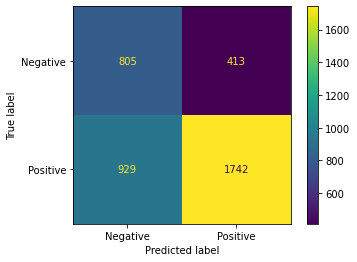

In [105]:
experiment(X_train_stem, y_train, X_test_stem, y_test)

### Only stop words 

In [115]:
X_train_stop, X_test_stop = preprocessing(X_train, X_test, stop_words=True)

Pipeline(steps=[('count', CountVectorizer(stop_words='english'))])


Accuracy Score: 0.8632039084597583
Precision Score: 0.9202357563850687
Recall Score: 0.8768251591164358
F1 Score: 0.898006134969325


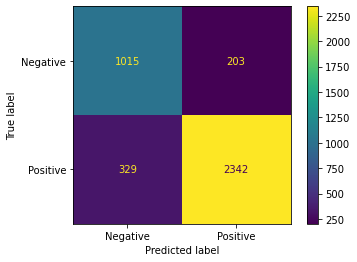

In [116]:
experiment(X_train_stop, y_train, X_test_stop, y_test)

### Only ngram tokenizing

In [108]:
X_train_ngram, X_test_ngram = preprocessing(X_train, X_test, stop_words=True)

Pipeline(steps=[('count', CountVectorizer(stop_words='english'))])


Accuracy Score: 0.8632039084597583
Precision Score: 0.9202357563850687
Recall Score: 0.8768251591164358
F1 Score: 0.898006134969325


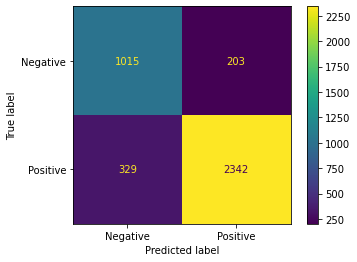

In [109]:
experiment(X_train_ngram, y_train, X_test_ngram, y_test)

### Only tfidf

In [112]:
X_train_tfidf, X_test_tfidf = preprocessing(X_train, X_test, tfidf=True)

Pipeline(steps=[('count', CountVectorizer()), ('tfid', TfidfTransformer())])


Accuracy Score: 0.8948315762406789
Precision Score: 0.9353348729792148
Recall Score: 0.909771621115687
F1 Score: 0.9223761624596698


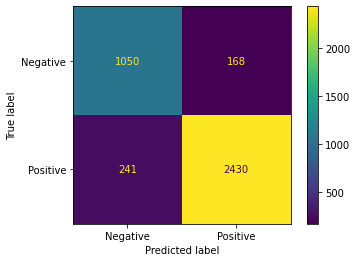

In [114]:
experiment(X_train_tfidf, y_train, X_test_tfidf, y_test)

## Trying Different Preprocessing Combinations 

In [77]:
from itertools import combinations

In [48]:
# List of preprocessing steps
techniques = ['stemming', 'stop_words', 'ngram', 'tfidf']

# Generate all combinations (besides combinations of length 1)
all_combinations = []
for r in range(2, len(techniques) + 1):
    all_combinations.extend(combinations(techniques, r))

# Make into list of dictionaries for use as arguments in the preprocessing function 
arg_list = []
for combo in all_combinations:
    arg_list.append(dict([(key, True) for key in combo]))
    

Pipeline(steps=[('count',
                 CountVectorizer(stop_words='english',
                                 tokenizer=<function stem_comments at 0x7f64392a29d0>))])
Preprocessing Combination: stemming, stop_words
Accuracy Score: 0.6538956029827719
Precision Score: 0.8045977011494253
Recall Score: 0.6551853238487458
F1 Score: 0.722245150639703


Pipeline(steps=[('count',
                 CountVectorizer(ngram_range=(2, 2),
                                 tokenizer=<function stem_comments at 0x7f64392a29d0>))])
Preprocessing Combination: stemming, ngram
Accuracy Score: 0.8135767549498586
Precision Score: 0.9004115226337449
Recall Score: 0.8191688506177461
F1 Score: 0.8578710056851597


Pipeline(steps=[('count',
                 CountVectorizer(tokenizer=<function stem_comments at 0x7f64392a29d0>)),
                ('tfid', TfidfTransformer())])
Preprocessing Combination: stemming, tfidf
Accuracy Score: 0.6585240421702238
Precision Score: 0.8056440600819299
Recall Score: 0.66267315

/home/ledan3/.local/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['b', 'c', 'd', 'e', 'f', 'g', 'h', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y'] not in stop_words.
  warnings.warn(


Preprocessing Combination: stemming, stop_words, ngram
Accuracy Score: 0.8071483671895089
Precision Score: 0.9010438413361169
Recall Score: 0.8079371022089106
F1 Score: 0.8519542045005923


Pipeline(steps=[('count',
                 CountVectorizer(stop_words='english',
                                 tokenizer=<function stem_comments at 0x7f64392a29d0>)),
                ('tfid', TfidfTransformer())])


/home/ledan3/.local/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['b', 'c', 'd', 'e', 'f', 'g', 'h', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y'] not in stop_words.
  warnings.warn(


Preprocessing Combination: stemming, stop_words, tfidf
Accuracy Score: 0.6533813319619439
Precision Score: 0.7989154993221871
Recall Score: 0.6619243728940472
F1 Score: 0.723996723996724


Pipeline(steps=[('count',
                 CountVectorizer(ngram_range=(2, 2),
                                 tokenizer=<function stem_comments at 0x7f64392a29d0>)),
                ('tfid', TfidfTransformer())])
Preprocessing Combination: stemming, ngram, tfidf
Accuracy Score: 0.8248907174080741
Precision Score: 0.9008863819500403
Recall Score: 0.8371396480718832
F1 Score: 0.8678439743838541


Pipeline(steps=[('count',
                 CountVectorizer(ngram_range=(2, 2), stop_words='english')),
                ('tfid', TfidfTransformer())])
Preprocessing Combination: stop_words, ngram, tfidf
Accuracy Score: 0.8146052969915145
Precision Score: 0.8173828125
Recall Score: 0.9400973418195433
F1 Score: 0.8744558593069823


Pipeline(steps=[('count',
                 CountVectorizer(ngram_range=(2, 2), s

/home/ledan3/.local/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['b', 'c', 'd', 'e', 'f', 'g', 'h', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y'] not in stop_words.
  warnings.warn(


Preprocessing Combination: stemming, stop_words, ngram, tfidf
Accuracy Score: 0.8169195165852404
Precision Score: 0.8989816700610997
Recall Score: 0.8262822912766754
F1 Score: 0.8611002731174404




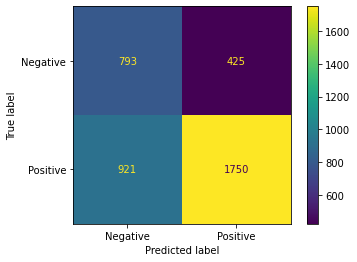

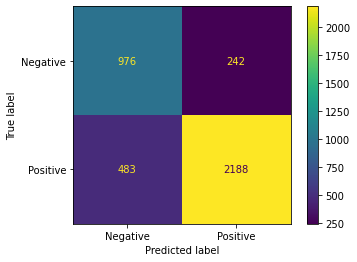

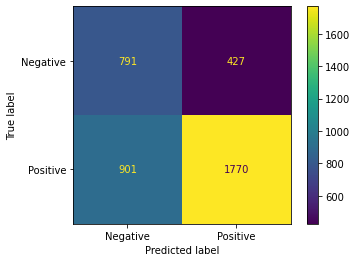

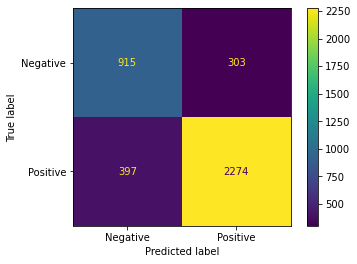

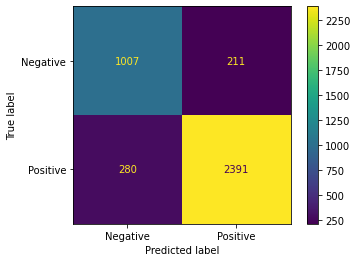

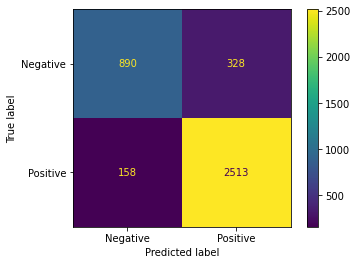

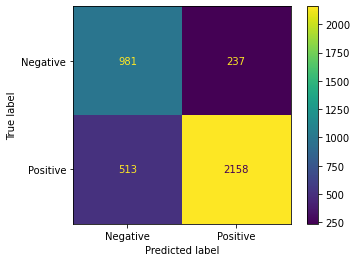

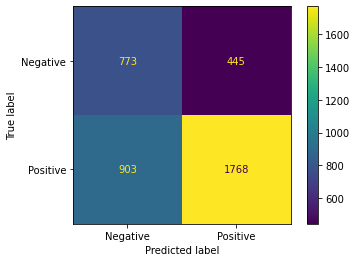

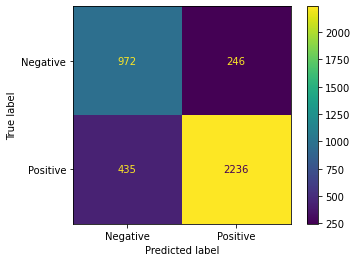

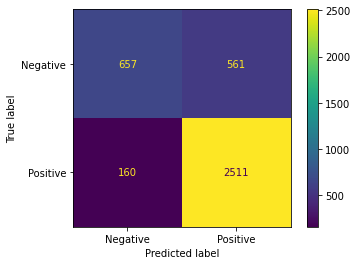

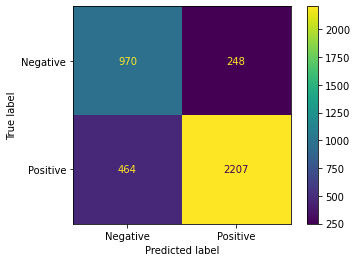

In [76]:
# Try the experiment with all combinations 

for i in range(len(arg_list)):
    X_train_vect, X_test_vect = preprocessing(X_train, X_test, **arg_list[i])
    print('Preprocessing Combination: '+', '.join(all_combinations[i]))
    experiment(X_train_vect, y_train, X_test_vect, y_test)
    print("\n")

In [22]:
svc = SVC()

In [23]:
svc.fit(X_train_vect,y_train)

SVC()

In [24]:
y_test_pred = svc.predict(X_test_vect)

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [26]:
print(f'Accuracy Score: {accuracy_score(y_test, y_test_pred)}')
print(f'Precision Score: {precision_score(y_test, y_test_pred)}')
print(f'Recall Score: {recall_score(y_test, y_test_pred)}')
print(f'F1 Score: {f1_score(y_test, y_test_pred)}')

Accuracy Score: 0.6873232193365904
Precision Score: 0.6871623359917675
Recall Score: 1.0
F1 Score: 0.8145776151265629


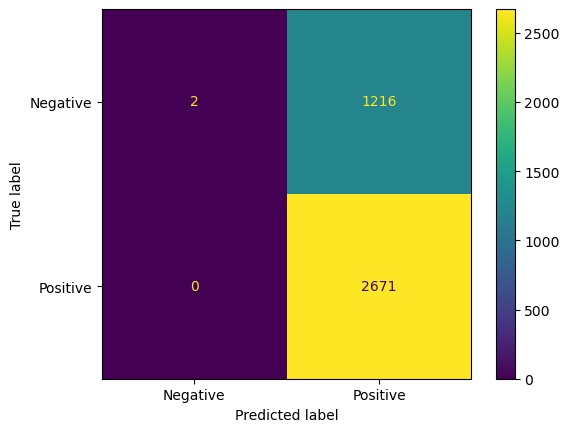

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot()